In [7]:
%cd ..
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
import scipy.stats as stats
import xarray as xr
import pdb
import glob
import itertools
import numpy.ma as ma
import pickle as pkl

##for regridding, install xesmf:
# conda install esmpy
# pip install xesmf
from utils import constants as cnst

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

/users/global/cornkle/pythonWorkspace


In [8]:
pwd

'/users/global/cornkle/pythonWorkspace'

In [11]:
dic = pkl.load( open (cnst.CLOVER_SAVES + 'bulk_-40_zeroRain_gt5k_-40thresh_OBSera.p', 'rb'))

In [12]:
dic.keys()

dict_keys(['hour', 'u925', 'clat', 'div925', 'tmean', 'pmax', 'q650', 'month', 'shear', 'u650', 'lon', 'rh925', 'div650', 't', 'w650', 'lat', 'v650', 'rh650', 'clon', 'pgt30', 'tmin', 'w925', 't650', 'p', 'v925', 'area', 'pv925', 'pgt01isvalid', 't925', 'pmean', 'q925', 'year', 'pv650'])

In [29]:
cc=11

pp = np.array(dic['pmax'])
sh = np.array(dic['shear']) #np.array(dic['shear']) * (-1)
umin = np.array(dic['u650']) * (-1)
umax = np.array(dic['u925'])
qq = np.array(dic['q925']) * 1000
tt = np.array(dic['tmin'])
month = np.array(dic['month'])
area = np.array(dic['area'])*(4.4**2)
lat = np.array(dic['clat'])

pos = np.where( (pp >= 0.1) & (month>=9))# np.where((pp >= 3) & (sh >= 8) &  (sh <= 30) &  (area<=700000) & ((month<=5) | (month>=10)) & (lat>=5) )   # 5 + 10 look nicest

tt = tt[pos]
pp = pp[pos]
qq = qq[pos]
sh = sh[pos]
umin = umin[pos]
umax = umax[pos]
lats = lat[pos]
area = area[pos]

(array([ 13.,  44.,  72.,  83.,  88.,  56.,  30.,  12.,   5.,   2.]),
 array([-4.64975071, -3.26750202, -1.88525333, -0.50300465,  0.87924404,
         2.26149273,  3.64374142,  5.0259901 ,  6.40823879,  7.79048748,
         9.17273617]),
 <a list of 10 Patch objects>)

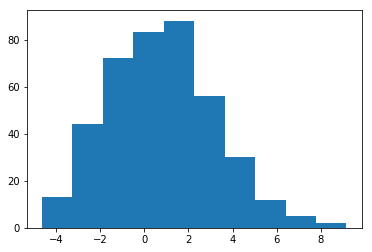

In [30]:
plt.hist(umax)

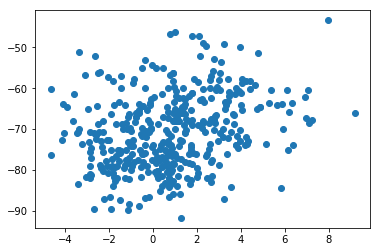

In [23]:
plt.scatter(umax, tt)